Import Module

In [1]:
import mofax as mfx
import pandas as pd 
import scPAFA

Import MOFA model from step 3

In [2]:
MOFA_model = mfx.mofa_model('../example_file/20240218_CRC_mofa_model_multi_group.hdf5')

Load sample-level clinical data

In [3]:
sample_meta = pd.read_csv('../example_file/CRC_sample_level_metadata.csv',index_col=0)

In [4]:
sample_meta[0:10]

,pseudobulk_sample.1,PatientTypeID,batch,MMRStatusTumor,TumorStage,TissueSource,ProcessingMethod,Site,Grade
pseudobulk_sample,,,,,,,,,
C103_T_v2,C103_T_v2,C103_T,v2,MMRp,notT4,MGH,unsorted,left,low
C104_T_v2,C104_T_v2,C104_T,v2,MMRp,notT4,MGH,unsorted,right,low
C105_T_v2,C105_T_v2,C105_T,v2,MMRp,T4,MGH,unsorted,right,low
C106_T_v2,C106_T_v2,C106_T,v2,MMRd,T4,MGH,unsorted,right,low
C107_T_v2,C107_T_v2,C107_T,v2,MMRp,notT4,MGH,unsorted,right,low
C109_T_v2,C109_T_v2,C109_T,v2,MMRd,notT4,DFCI,unsorted,right,low
C110_T_v2,C110_T_v2,C110_T,v2,MMRd,notT4,MGH,unsorted,right,high
C111_T_v2,C111_T_v2,C111_T,v2,MMRd,notT4,DFCI,unsorted,right,low
C112_T_v2,C112_T_v2,C112_T,v2,MMRp,notT4,DFCI,unsorted,right,low


Extract latent factors matrix from MOFA model

In [5]:
latent_factor_matrix = pd.concat(MOFA_model.get_factors(df=True,concatenate_groups =False,scale=True))

In [6]:
latent_factor_matrix[0:10]

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8
C103_T_v2,0.587244,-0.350571,-0.906412,0.409376,-0.537103,1.019074,0.232438,0.617581
C104_T_v2,0.188657,1.925847,-1.501763,-1.246152,-1.219757,-0.688586,0.783085,-0.974393
C105_T_v2,0.039004,0.393457,-0.981909,-0.335365,-0.636267,0.395269,1.610829,-0.614243
C106_T_v2,-0.306096,1.336617,-0.283340,-0.870063,-1.004401,-1.137710,1.508084,-0.709423
C107_T_v2,-0.226742,-0.771198,0.480736,1.102880,1.159735,0.361875,-1.664520,1.764681
C109_T_v2,0.624041,-0.223572,-1.022528,0.150920,-0.936495,0.789582,0.138903,0.062398
C110_T_v2,-2.894390,1.685591,3.376307,0.643963,0.723542,0.983847,-0.325267,-0.005856
C111_T_v2,-0.528775,-0.543162,0.320007,-0.896898,1.978113,-0.169594,0.327010,0.752420
C112_T_v2,-0.594538,-0.624070,-1.131846,1.124498,-1.428860,1.055386,0.360469,0.144001
C113_T_v2,-0.215605,-0.159866,-0.426619,-0.814004,0.364399,0.172509,-1.279116,-0.260806


Align sample-level clinical data with latent factors matrix 

In [7]:
sample_meta = sample_meta.loc[latent_factor_matrix.index]

## Identify multicellular pathway modules related with MMR 

In [8]:
scPAFA.st.normality_and_variance_homogeneity(sample_factor_df=latent_factor_matrix,metadata=sample_meta,label_column='MMRStatusTumor')

Normality or Variance Homogeneity test failed, nonparametric_test_category() is recommended


,Factor,Group,Normality,Normality Test Type,Variance Homogeneity,Test Type
0,Factor1,MMRp,0.010089,Shapiro-Wilk,0.463630,Levene
1,Factor1,MMRd,0.008336,Shapiro-Wilk,0.463630,Levene
2,Factor2,MMRp,0.399238,Shapiro-Wilk,0.050617,Levene
3,Factor2,MMRd,0.557757,Shapiro-Wilk,0.050617,Levene
4,Factor3,MMRp,0.356126,Shapiro-Wilk,0.006109,Levene
5,Factor3,MMRd,0.495348,Shapiro-Wilk,0.006109,Levene
6,Factor4,MMRp,0.357566,Shapiro-Wilk,0.492991,Levene
7,Factor4,MMRd,0.000733,Shapiro-Wilk,0.492991,Levene
8,Factor5,MMRp,0.074762,Shapiro-Wilk,0.118398,Levene
9,Factor5,MMRd,0.874107,Shapiro-Wilk,0.118398,Levene


In [9]:
test_result = scPAFA.st.nonparametric_test_category(sample_factor_df=latent_factor_matrix,metadata=sample_meta,label_column='MMRStatusTumor')

In [10]:
#test_result

In [11]:
# factors 2, 3 and 6 can be considered as tumor cell-based MMR status related multicellular pathway modules.
test_result['Factor'] [test_result['p_adj'] < 0.05]

1    Factor2
2    Factor3
5    Factor6
Name: Factor, dtype: object

## Sample stratification

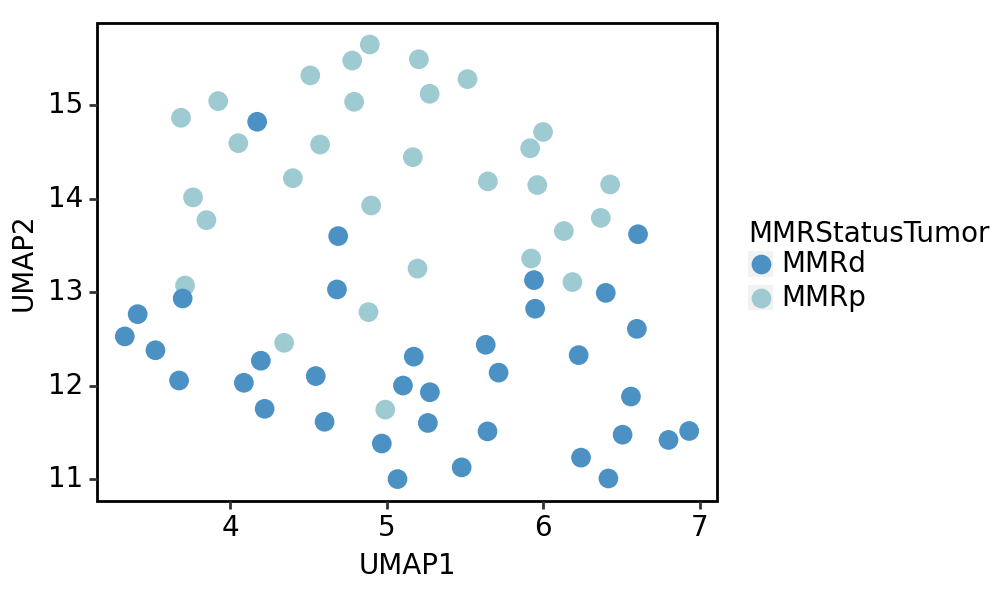

<Figure Size: (500 x 300)>

In [12]:
#Run umap on latent_factor_matrix and visualization
scPAFA.pl.runumap_and_plot(sample_factor_df=latent_factor_matrix,
                           metadata=sample_meta,
                           label_column='MMRStatusTumor',
                           width=5,
                           height=3,
                           random_state=2023,
                           point_size=3,
                           color_mapping={"MMRd":"#4b91c3","MMRp":"#9ecad2"})

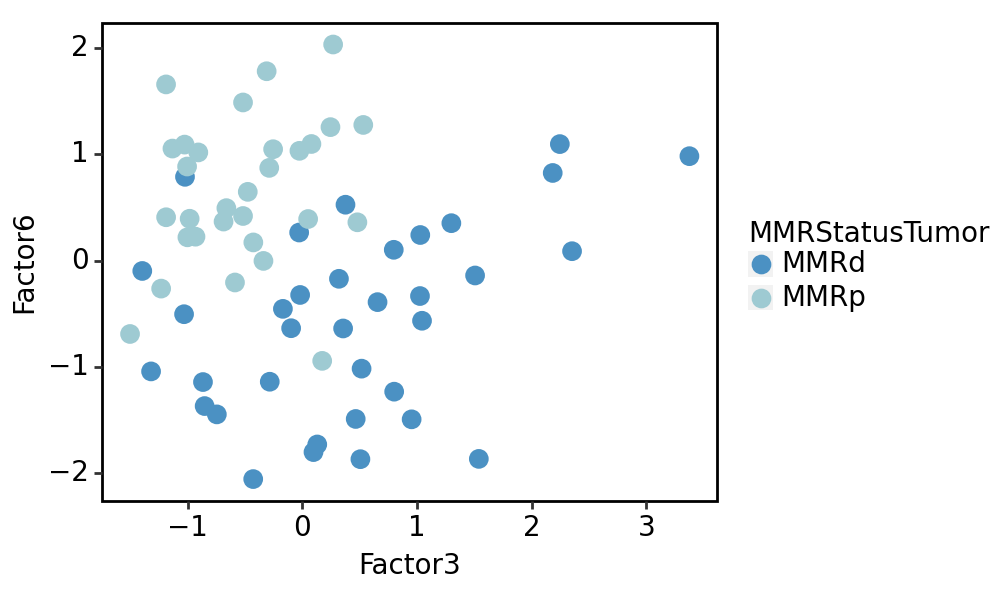

<Figure Size: (500 x 300)>

In [13]:
scPAFA.pl.plot_factor_scatter_2D(sample_factor_df=latent_factor_matrix,
                                 metadata=sample_meta,
                                 label_column='MMRStatusTumor',
                                 factor_x='Factor3',
                                 factor_y='Factor6',
                                 point_size=3,
                                 width=5,height=3,color_mapping={"MMRd":"#4b91c3","MMRp":"#9ecad2"})

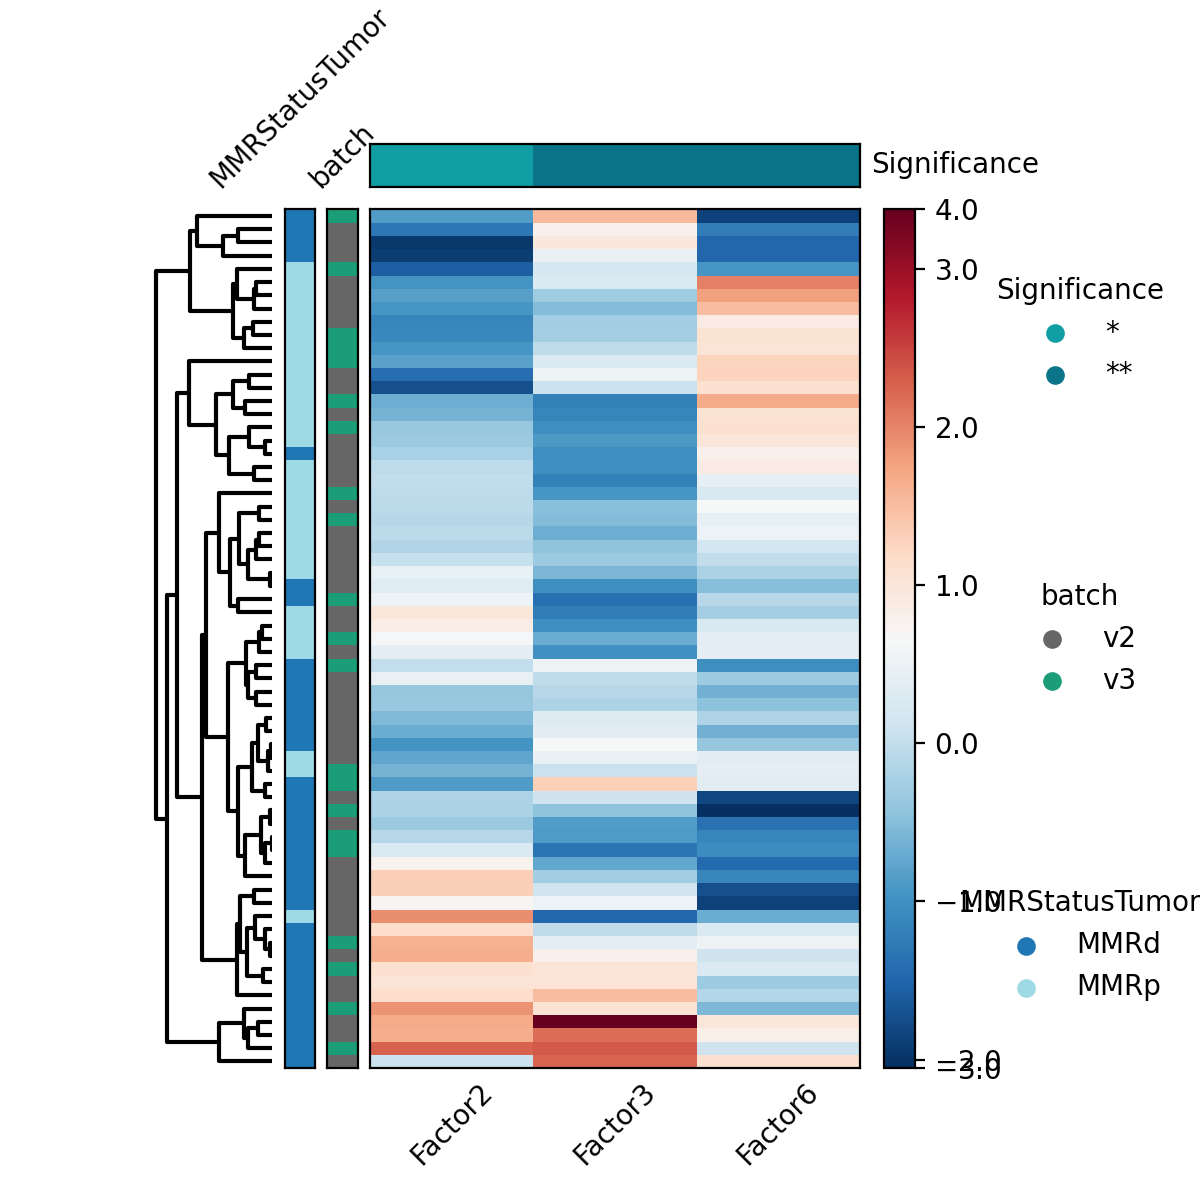

In [14]:
#hierarchical clustering of factors 2,3 and 6
cmaps={'MMRStatusTumor':'tab20','batch':'Dark2_r'}

scPAFA.pl.draw_cluster_heatmap(sample_factor_df=latent_factor_matrix[['Factor2','Factor3','Factor6']],
                              sample_annotaion_df=pd.DataFrame(sample_meta[['batch','MMRStatusTumor']]),
                              p_value_dataframe=test_result,
                              custom_cmap=cmaps,
                              figsize = (6,6))

In [15]:
import matplotlib.pyplot as plt
plt.close()

## Interpretation of multicellular pathway modules

Extract weight matrix from MOFA model

In [16]:
weight_matrix = pd.concat(MOFA_model.get_weights(concatenate_views =False,scale=True,df =True))

In [17]:
weight_matrix[0:10]

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8
bioplanet_1529_Endosomal/vacuolar pathway_View_Tumor cE01 (StemTA-like),0.686277,2.826685,3.050911,-0.065750,1.719641,4.381969,-0.357975,-1.064239
GAVISH_3CA_MALIGNANT_METAPROGRAM_17_INTERFERON_MHC_II_1_View_Tumor cE01 (StemTA-like),-1.518922,3.108574,5.215108,-0.320869,-0.715395,2.193690,-0.348167,-1.268768
bioplanet_1105_Chemiosmotic coupling formation of ATP_View_Tumor cE01 (StemTA-like),3.519541,-3.101258,2.807305,-0.674708,-1.468972,0.263352,-0.262851,-1.048987
bioplanet_1537_Folding of actin by CCT/TriC_View_Tumor cE01 (StemTA-like),0.057369,-4.176271,-0.213292,0.804222,-2.012863,3.821150,-0.649345,1.724173
GAVISH_3CA_METAPROGRAM_B_CELLS_METABOLISM_MYC_View_Tumor cE01 (StemTA-like),0.060732,-3.231309,1.833093,0.028139,-2.508113,0.535262,-1.726890,3.691770
bioplanet_321_Bystander B cell activation_View_Tumor cE01 (StemTA-like),0.323647,3.588189,3.000016,0.117774,-2.010051,1.025204,-0.357319,1.398916
GAVISH_3CA_MALIGNANT_METAPROGRAM_14_EMT_3_View_Tumor cE01 (StemTA-like),-0.763690,-0.566439,1.928227,1.930301,3.028849,-1.986865,-1.030419,1.411913
"bioplanet_801_Respiratory electron transport, ATP biosynthesis by chemiosmotic coupling, and heat production by uncoupling proteins_View_Tumor cE01 (StemTA-like)",4.083991,-2.365280,2.311033,-0.888632,-1.184626,0.535085,0.014270,-1.990636
bioplanet_211_Eosinophils in the chemokine network of allergy_View_Tumor cE01 (StemTA-like),0.298696,3.588390,2.931322,0.119848,-1.915584,0.956602,-0.347390,1.291308
GAVISH_3CA_METAPROGRAM_EPITHELIAL_PDAC_RELATED_2_View_Tumor cE01 (StemTA-like),-0.541071,0.825566,1.787237,-0.117828,2.984353,-1.978756,-0.172743,0.241485


visualization of high-weighted pathways

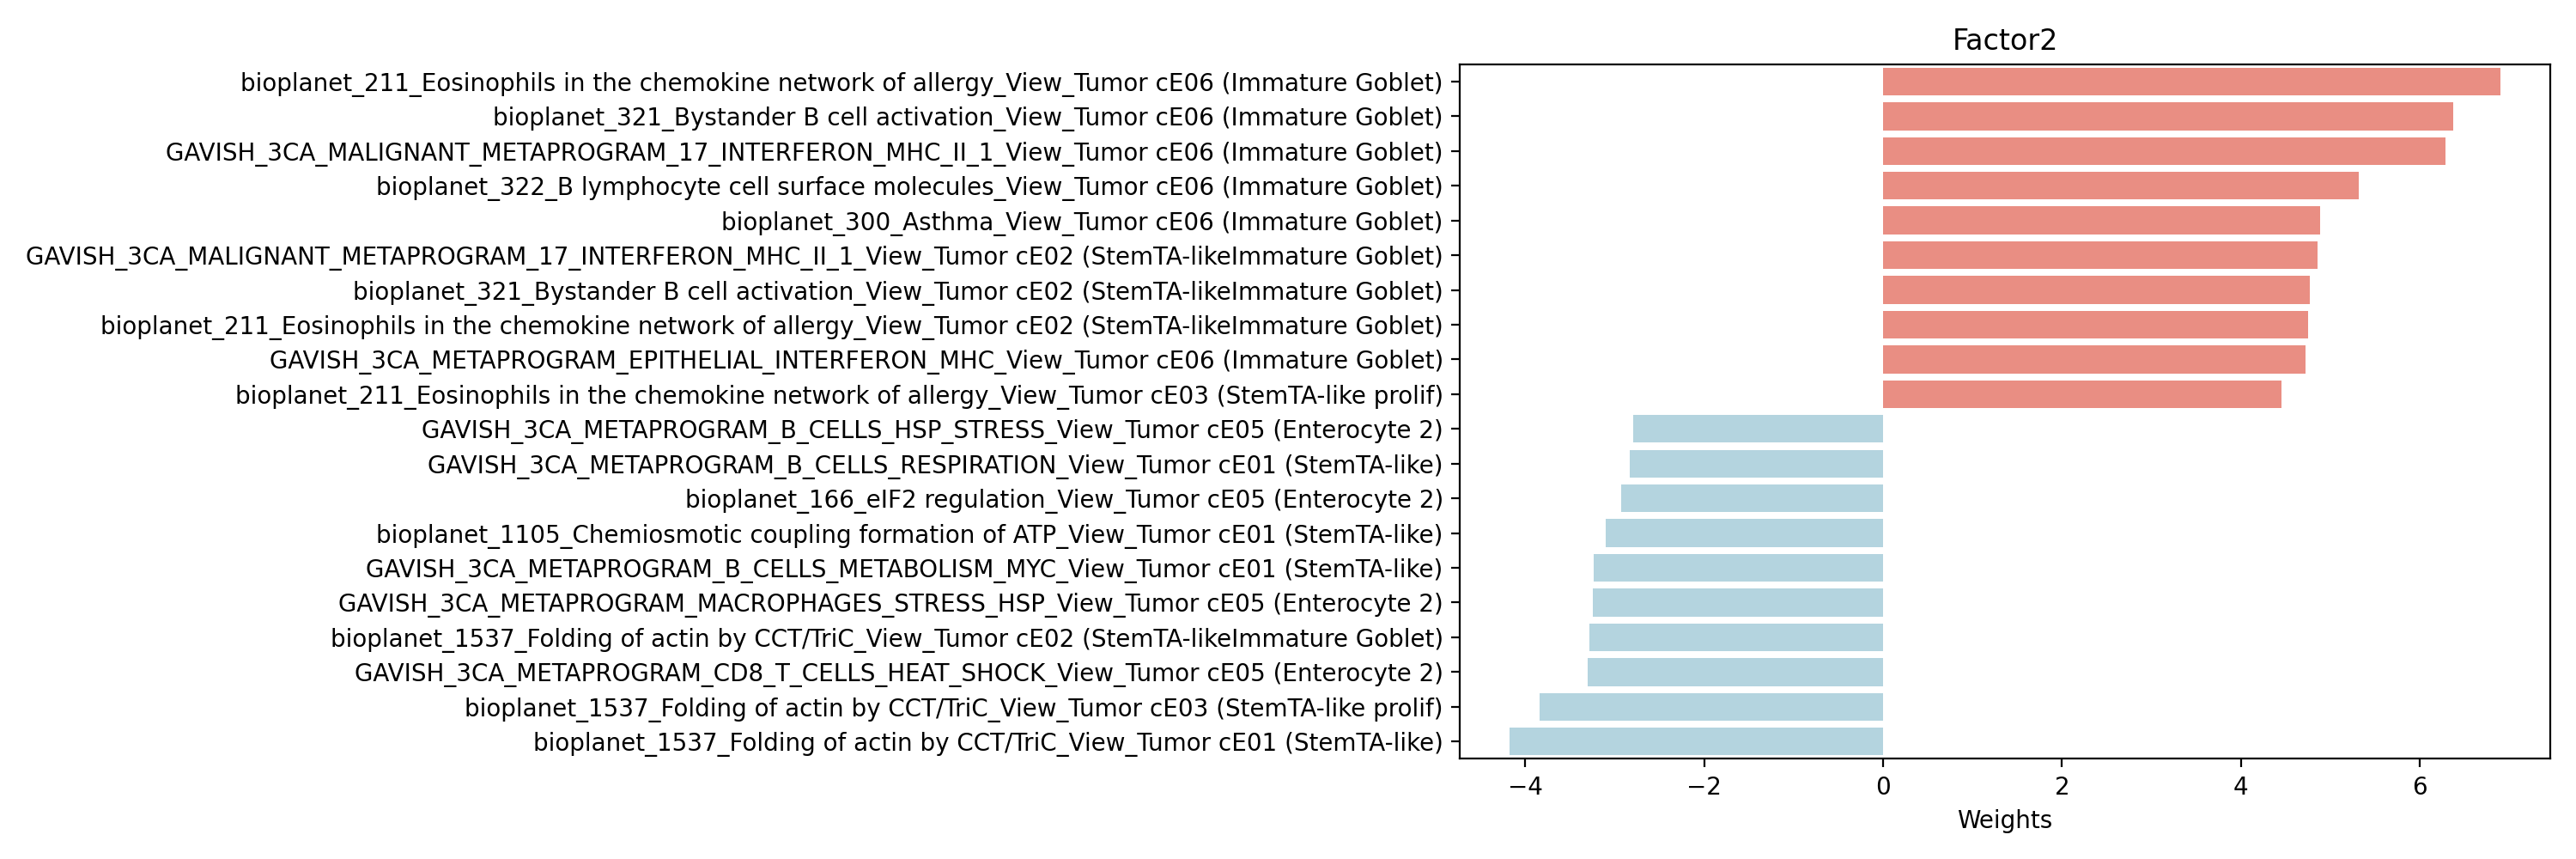

In [18]:
plt.rcParams.update({'font.size': 10})
scPAFA.pl.plot_weights_butterfly(weight_matrix=weight_matrix,factor_name='Factor2',label_beside_bar=False,figsize=(15,5))
plt.tight_layout()
plt.show()

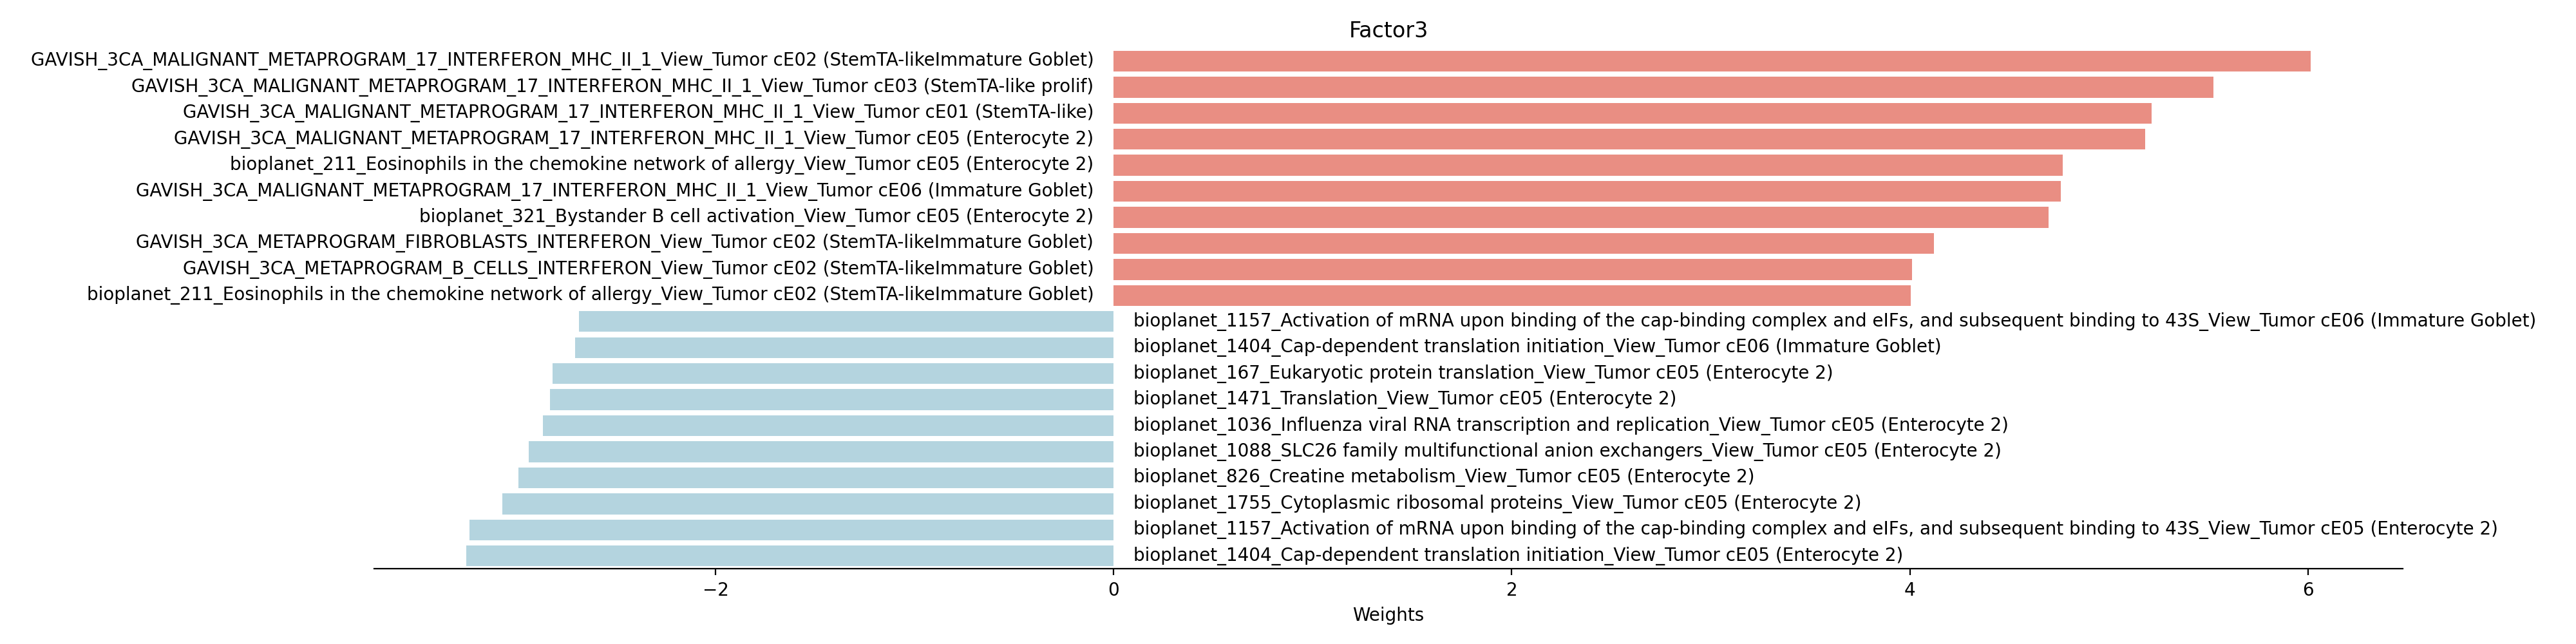

In [19]:
scPAFA.pl.plot_weights_butterfly(weight_matrix=weight_matrix,factor_name='Factor3',figsize=(20,5))
plt.tight_layout()
plt.show()

Visualization of the variance explained by factors

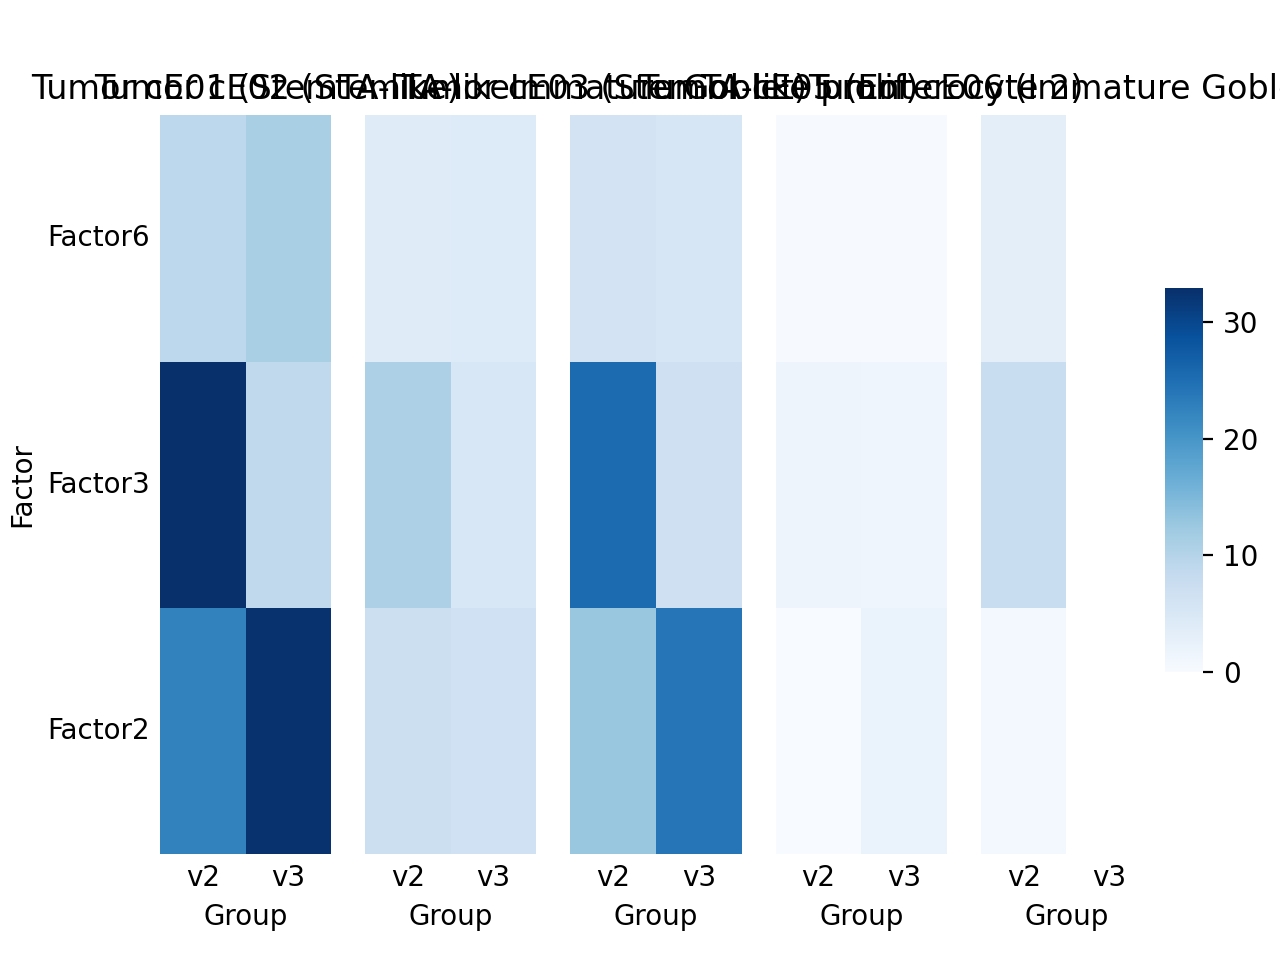

In [20]:
mfx.plot_r2(MOFA_model,factors=['Factor2','Factor3','Factor6'],cmap="Blues")

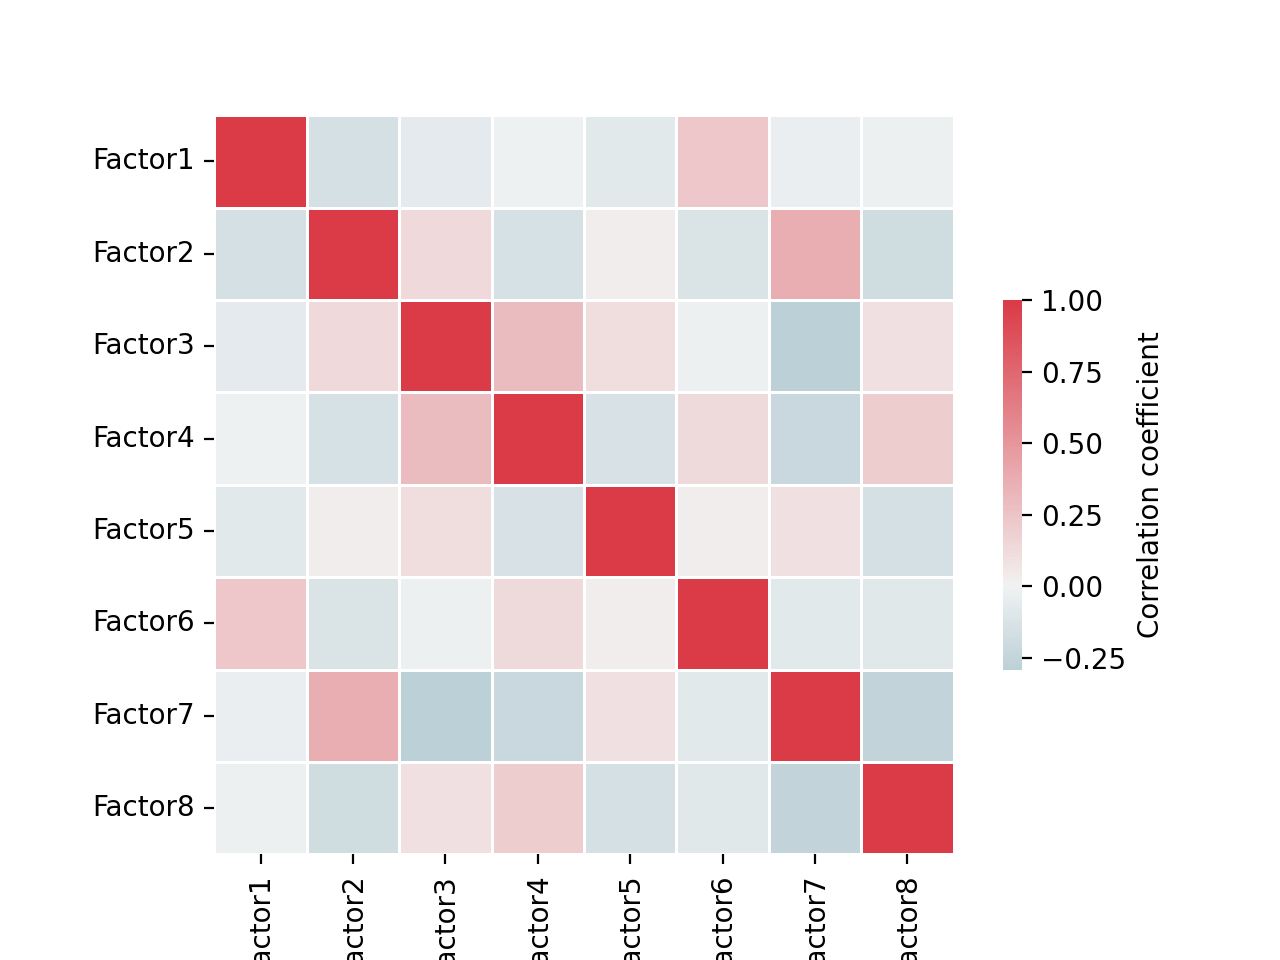

In [21]:
mfx.plot_factors_correlation(MOFA_model)
plt.show()

### For more visualization methods of MOFA model, please refer to the tutorials of mofax(https://github.com/bioFAM/mofax/blob/master/notebooks/getting_started_pbmc10k.ipynb)